In [17]:
pwd

'C:\\Users\\ayush\\Beats Compiler\\B'

In [18]:
cd C:\\Users\\ayush\\Beats Compiler\\B

C:\Users\ayush\Beats Compiler\B


In [51]:
import librosa
import IPython.display as ipd
#help(librosa.beat)
print(format('.............This is a program used for beat detection................','^40'))
#reding the audio
y, sr = librosa.load('C:\\Users\\ayush\\Downloads\\sample.wav')

.............This is a program used for beat detection................


In [23]:
#finding the beat location
bpm , beat_locations = librosa.beat.beat_track(y = time_series , sr = sample_rate)
print(bpm)
print(beat_locations)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\fftpack\basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


123.046875
[  48   69   90  112  133  154  175  197  219  240  262  283  304  325
  346  368  389  411  433  454  475  496  517  539  561  582  603  624
  646  667  688  710  731  753  774  795  817  838  860  881  902  924
  945  966  988 1009 1031 1052 1073 1095 1116 1137 1159 1180 1201 1223
 1244 1266 1287 1308 1330 1351 1372 1393 1415]


In [31]:
 tempo, beats = librosa.beat.beat_track(y=y, sr=sr)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\fftpack\basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


In [33]:
tempo

123.046875

In [34]:
beats[:20]

array([ 48,  69,  90, 112, 133, 154, 175, 197, 219, 240, 262, 283, 304,
       325, 346, 368, 389, 411, 433, 454])

In [35]:
librosa.frames_to_time(beats[:20], sr=sr) #printing it in the time format

array([ 1.11455782,  1.60217687,  2.08979592,  2.60063492,  3.08825397,
        3.57587302,  4.06349206,  4.57433107,  5.08517007,  5.57278912,
        6.08362812,  6.57124717,  7.05886621,  7.54648526,  8.03410431,
        8.54494331,  9.03256236,  9.54340136, 10.05424036, 10.54185941])

In [44]:
onset_env = librosa.onset.onset_strength(y, sr=sr,aggregate=np.median) #tracking the beats

In [45]:
tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env,sr=sr)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\fftpack\basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


In [46]:
tempo

123.046875

In [47]:
beats[:20] #seeing the first 20 beats

array([ 48,  69,  90, 112, 133, 154, 175, 197, 219, 240, 262, 283, 304,
       325, 346, 368, 389, 411, 433, 454])

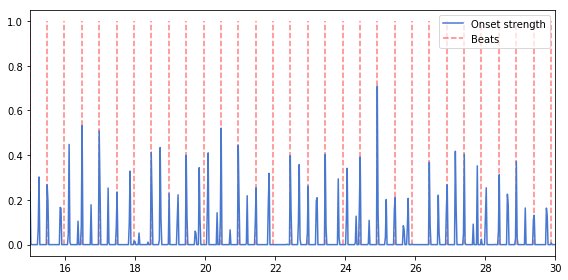

In [43]:
import matplotlib.pyplot as plt
hop_length = 512
plt.figure(figsize=(8, 4))
times = librosa.frames_to_time(np.arange(len(onset_env)),sr=sr, hop_length=hop_length)
plt.plot(times, librosa.util.normalize(onset_env), label='Onset strength')
plt.vlines(times[beats], 0, 1, alpha=0.5, color='r', linestyle='--', label='Beats')
plt.legend(frameon=True, framealpha=0.75)
# Limit the plot to a 15-second window
plt.xlim(15, 30)
plt.gca().xaxis.set_major_formatter(librosa.display.TimeFormatter())
plt.tight_layout()